In [1]:
from sklearn import datasets
import pandas as pd
data = datasets.load_boston()

# Lea el DataFrame, primero usando los datos de la función
df = pd.DataFrame(data.data, columns = data.feature_names)# Add a target column, and fill it with the target data
df['target'] = data.target# Show the first five rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
from sklearn.model_selection import train_test_split

#aquí hago que mi variable "X" sea igual al marco de datos "df", pero con las columnas "Dirección" y "precio_venta" eliminadas
X = df.drop(["target"], axis = 1)
# aquí creo una variable "y" con la columna "precio_venta" para mi marco de datos (df)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 101)

## Capacidad¶

La capacidad de un modelo se refiere al tamaño y la complejidad de los patrones que puede aprender. En el caso de las redes neuronales, esto dependerá en gran medida de la cantidad de neuronas que tenga y de cómo estén conectadas entre sí. Si parece que su red no está adaptando los datos, debería intentar aumentar su capacidad.

## activación 'relu'

La función de activación lineal rectificada o ReLU para abreviar es una función lineal por partes que generará la entrada directamente si es positiva; de lo contrario, generará cero. ... La función de activación lineal rectificada supera el problema del gradiente de desaparición, lo que permite que los modelos aprendan más rápido y funcionen mejor

## La función de pérdida¶

Hemos visto cómo diseñar una arquitectura para una red, pero no hemos visto cómo decirle a una red qué problema resolver. Este es el trabajo de la función de pérdida.

La función de pérdida mide la disparidad entre el valor real del objetivo y el valor que predice el modelo.

Diferentes problemas requieren diferentes funciones de pérdida. Hemos estado analizando problemas de regresión, donde la tarea es predecir algún valor numérico: calorías en 80 cereales, calificación en calidad de vino tinto. Otras tareas de regresión podrían ser predecir el precio de una casa o la eficiencia de combustible de un automóvil.

Una función de pérdida común para los problemas de regresión es el error absoluto medio o MAE. Para cada predicción y_pred, MAE mide la disparidad del objetivo verdadero y_true por una diferencia absoluta abs (y_true - y_pred).

La pérdida total de MAE en un conjunto de datos es la media de todas estas diferencias absolutas.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

#Construimos el modelo#
input_shape = [13]#numero de entradas(inputs)

model = keras.Sequential([
     
    #capa de normalizacion (Batch Normalization)
    #Y si lo agrega como la primera capa de su red, puede actuar como una especie de preprocesador adaptativo,
    #Remplazando algo como el Escalador estándar de Sci-Kit Learn.
    layers.BatchNormalization( input_shape = input_shape),
    
    # la capa oculta de ReLU
    layers.Dense(units = 30, activation = 'relu'),
    
    #Normalización por lotes de capas
    layers.BatchNormalization(),
    
#pensar en la deserción escolar como crear una especie de conjunto de redes.
     #Las predicciones ya no las hará una gran red, sino un comité de redes más pequeñas.
     #Las personas en el comité tienden a cometer diferentes tipos de errores, pero tienen razón al mismo tiempo, lo que hace que el comité en su conjunto sea mejor que cualquier individuo.
     # (Si está familiarizado con los bosques aleatorios como un conjunto de árboles de decisión, es la misma idea).
     # La "capa de abandono"("dropout layer"), que puede ayudar a corregir el sobreajuste.
    layers.Dropout(rate = 0.3), #aplicar un 30% de abandono a la siguiente capa
    
    #Capa de normalizacion (Batch Normalization)
    layers.BatchNormalization(),
    
    # Capa oculta ReLu
    layers.Dense(units = 15, activation = 'relu'),
    
    #Capa de normalizacion (Batch Normalization)
    layers.BatchNormalization(),
    
    # Salida lineal
    layers.Dense(units = 1),
])

#optimizador de sesgos
model.compile(optimizer = 'adam',#Una "optimizer" que puede decirle a la red cómo cambiar sus pesos. Aquí usé el optimizador "adam" (pero hay más)
                loss = 'mae',)   #Una "loss function" que mide qué tan buenas son las predicciones de la red (aquí utilicé el error absoluto medio)

2021-12-04 12:45:15.541986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/oracle/instantclient_19_8
2021-12-04 12:45:15.542044: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-04 12:45:17.456251: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/oracle/instantclient_19_8
2021-12-04 12:45:17.456303: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-04 12:45:17.456331: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (virtual-machine): /pro

In [ ]:
#Interpretar las curvas de aprendizaje
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,      # cantidad mínima de cambio para contar como una mejora
    patience = 5,           # cuantas épocas esperar antes de parar
    restore_best_weights = True,
)

In [4]:
#Aqui entrenamos el modelo
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),#Validacion de data usando los datos de testo
    batch_size = 256,                  #montaje de datos por bloque
    epochs = 150,                      #Nuemero de epocas de entrenamiento
    callbacks = [early_stopping]       #Utilizar la interpretación de las curvas de aprendizaje
)

Epoch 1/150
2/2 [==============================] - 2s 250ms/step - loss: 21.5042 - val_loss: 18.0525
Epoch 2/150
2/2 [==============================] - 0s 31ms/step - loss: 21.4943 - val_loss: 18.6326
Epoch 3/150
2/2 [==============================] - 0s 42ms/step - loss: 21.4843 - val_loss: 19.0624
Epoch 4/150
2/2 [==============================] - 0s 35ms/step - loss: 21.4742 - val_loss: 19.3980
Epoch 5/150
2/2 [==============================] - 0s 43ms/step - loss: 21.4640 - val_loss: 19.5541
Epoch 6/150
2/2 [==============================] - 0s 45ms/step - loss: 21.4537 - val_loss: 19.7493


Cuando entrenamos un modelo, hemos graficado la pérdida en el conjunto de entrenamiento época por época. A esto también agregaremos un gráfico con los datos de validación. Estos gráficos los llamamos curvas de aprendizaje. Para entrenar modelos de aprendizaje profundo de manera efectiva, debemos ser capaces de interpretarlos.

Ahora, la pérdida de entrenamiento disminuirá cuando el modelo aprenda la señal o cuando aprenda el ruido. Pero la pérdida de validación disminuirá solo cuando el modelo aprenda la señal. (Cualquier ruido que el modelo haya aprendido del conjunto de entrenamiento no se generalizará a nuevos datos). Por lo tanto, cuando un modelo aprende la señal, ambas curvas bajan, pero cuando aprende ruido se crea un espacio en las curvas. El tamaño del espacio le dice cuánto ruido ha aprendido el modelo.

In [2]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

NameError: name 'history' is not defined

Puede ver que Keras lo mantendrá actualizado sobre la pérdida a medida que el modelo entrena.

Sin embargo, a menudo, una mejor manera de ver la pérdida es trazarla. De hecho, el método de ajuste mantiene un registro de la pérdida producida durante el entrenamiento en un objeto Historial. Convertiremos los datos a un marco de datos de Pandas, lo que facilita el trazado

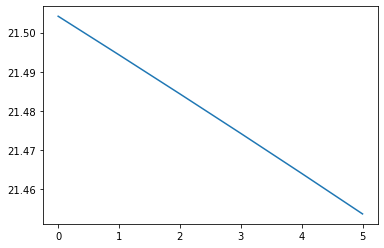

In [7]:
# convertir el historial de entrenamiento en un marco de datos
history_df = pd.DataFrame(history.history)
# utilizar el método de "plot" nativa de Pandas
history_df['loss'].plot();